In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import yaml
import common

FONT_SIZE = 15

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [77]:
# [0, 99999] -> 0, [100000, 199999] -> 1
max_n_past_timestamps = 4
threshold = int(1e7)
# threshold = int(1e5)
log1p_threshold = np.log1p(threshold)
bin_width =  int(1e6)
# bin_width = 10000
n_bin = threshold//bin_width

snapshot_interval = int(1e7)
# snapshot_interval = 100000

In [78]:
fields = ['key'] + [f'e{i}' for i in range(10)] + ['i0'] + [f'd{i}' for i in range(1, max_n_past_timestamps)]

In [79]:
df_snapshot = pd.read_csv(f'{common.WEBCACHESIM_ROOT}/snapshot_1.log', delimiter=' ', names=fields)

In [81]:
df_snapshot.head()

,key,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,i0,d1,d2,d3
0,6355277154846406492,5949,9149,16341,16722,14267,13963,12647,14020,6025,11955,1642,391,80,177
1,5151997154538786157,13864,12129,11400,11045,11218,13246,12290,14215,13841,11475,12,73,488,30
2,8975157457366057399,1,0,0,0,0,0,1,2,1,0,226052,3125643,302490,99125
3,1550438056448497221,1,0,0,0,1,2,0,1,1,0,2518097,207307,3180402,1716617
4,681810876233799101,0,0,0,0,0,1,1,0,0,0,6059571,3940424,10000000,10000000


In [82]:
for i in (['i0'] + [f'd{i}' for i in range(1, max_n_past_timestamps)]):
    df_snapshot.loc[:, f'c{i}'] = df_snapshot[i]//1000000

In [83]:
df_mean = df_snapshot[['ci0'] + [f'cd{i}' for i in range(1, max_n_past_timestamps)]+[f'e{i}' for i in range(10)]].groupby(['ci0'] + [f'cd{i}' for i in range(1, max_n_past_timestamps)]).aggregate('mean')

In [84]:
df_mean

e0         e1        e2        e3        e4        e5  \
ci0 cd1 cd2 cd3                                                                 
0   0   0   0    10.401052  10.009827  9.747500  9.794830  9.756250  9.708105   
            1     1.251385   1.217056  1.164539  1.161166  1.168393  1.198988   
            2     0.948405   0.870544  0.769543  0.788931  0.841463  0.802064   
            3     0.836759   0.739284  0.643570  0.629477  0.664122  0.665297   
            4     0.756906   0.678453  0.491713  0.491713  0.530387  0.504972   
            5     0.720199   0.607616  0.443709  0.417219  0.478477  0.438742   
            6     0.757991   0.605023  0.401826  0.422374  0.490868  0.394977   
            7     0.670068   0.540816  0.377551  0.367347  0.397959  0.414966   
            8     0.802632   0.539474  0.309211  0.368421  0.342105  0.263158   
            9     2.263158   0.842105  0.315789  0.473684  0.526316  0.368421   
            10    0.823568   0.587228  0.216590  0.219882  0.315997  0.226465   
        1   0     1.112949   1.161708  1.215035  1.216887  1.200346  1.244044   
            1     0.831615   0.838832  0.770103  0.815808  0.808935  0.834364   
            2     0.722607   0.669209  0.638696  0.612344  0.693481  0.624133   
            3     0.622892   0.590361  0.527711  0.480723  0.520482  0.486747   
            4     0.610895   0.536965  0.404669  0.466926  0.484436  0.517510   
            5     0.467914   0.489305  0.363636  0.350267  0.358289  0.398396   
            6     0.464730   0.460581  0.406639  0.298755  0.373444  0.477178   
            7     0.441176   0.470588  0.225490  0.294118  0.333333  0.254902   
            8     0.666667   0.555556  0.888889  0.555556  0.222222  0.333333   
            10    0.366822   0.323598  0.237150  0.261682  0.267523  0.234813   
        2   0     0.885124   0.842530  0.794773  0.792514  0.801226  0.832849   
            1     0.705285   0.678184  0.600271  0.594173  0.609756  0.630759   
            2     0.660773   0.580110  0.493923  0.510497  0.539227  0.549171   
            3     0.553672   0.531073  0.403013  0.436911  0.442561  0.483992   
            4     0.569801   0.509972  0.424501  0.333333  0.447293  0.410256   
            5     0.504274   0.405983  0.410256  0.324786  0.371795  0.435897   
            6     0.429825   0.429825  0.271930  0.350877  0.596491  0.403509   
            7     0.400000   0.800000  0.000000  0.000000  0.400000  0.400000   
            10    0.378446   0.304511  0.243108  0.201754  0.258145  0.234336   
...                    ...        ...       ...       ...       ...       ...   
7   0   1   0     0.255319   0.241135  0.368794  0.361702  0.290780  0.219858   
            1     0.000000   0.000000  0.100000  0.200000  0.200000  0.400000   
            10    0.171508   0.192254  0.228216  0.235131  0.211618  0.195021   
        2   0     0.285714   0.142857  0.571429  0.285714  0.428571  0.142857   
            10    0.171975   0.203822  0.254777  0.267516  0.222930  0.248408   
        10  10    0.107221   0.122135  0.129199  0.130612  0.119309  0.127002   
    1   0   0     0.312500   0.250000  0.381944  0.250000  0.243056  0.333333   
            1     0.222222   0.333333  0.222222  0.111111  0.555556  0.111111   
            10    0.180865   0.212320  0.204456  0.192661  0.208388  0.235911   
        1   0     0.333333   0.333333  0.111111  0.333333  0.111111  0.222222   
            10    0.193103   0.158621  0.193103  0.186207  0.172414  0.220690   
        10  10    0.113054   0.120380  0.131369  0.128205  0.131535  0.137196   
    2   0   0     0.000000   0.625000  0.375000  0.375000  0.125000  1.125000   
            10    0.194631   0.194631  0.241611  0.228188  0.255034  0.154362   
        10  10    0.099067   0.121349  0.122252  0.116531  0.121048  0.113520   
    10  10  10    0.041961   0.045652  0.045815  0.045398  0.047730  0.048597   
8   0   0   0     0.169355   0.177419  0.467742  0.3951

In [85]:
df_mean.reset_index().to_csv('../bins_weight1.csv', index=0, header=0, sep=' ')

In [114]:
for sid in range(1, 20):
    df_snapshot = pd.read_csv(f'{common.WEBCACHESIM_ROOT}/snapshot_{sid}.log', delimiter=' ', names=fields)
    for i in (['i0'] + [f'd{i}' for i in range(1, max_n_past_timestamps)]):
        df_snapshot.loc[:, f'c{i}'] = df_snapshot[i]//1000000
    df_mean = df_snapshot[['ci0'] + [f'cd{i}' for i in range(1, max_n_past_timestamps)]+
        [f'e{i}' for i in range(10)]].groupby(['ci0'] + [f'cd{i}' for i in range(1, max_n_past_timestamps)]).aggregate('mean')
    df_mean.reset_index().to_csv(f'../bins_weight{sid}.csv', index=0, header=0, sep=' ')

In [87]:
df1 = df_mean.reset_index()

In [92]:
[f'e{i}' for i in range(10)]

['e0', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9']

In [99]:
(df1[[f'e{i}' for i in range(10)]] > 1).any(1)

0       True
1       True
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9       True
10     False
11      True
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982     True
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [104]:
df1[((df1[[f'e{i}' for i in range(10)]] > 0.9).any(1))]

,ci0,cd1,cd2,cd3,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9
0,0,0,0,0,10.401052,10.009827,9.747500,9.794830,9.756250,9.708105,9.444927,10.164369,10.395913,9.909160
1,0,0,0,1,1.251385,1.217056,1.164539,1.161166,1.168393,1.198988,1.156468,1.226933,1.226692,1.164177
2,0,0,0,2,0.948405,0.870544,0.769543,0.788931,0.841463,0.802064,0.768918,0.844590,0.944340,0.824265
9,0,0,0,9,2.263158,0.842105,0.315789,0.473684,0.526316,0.368421,0.263158,0.736842,1.473684,0.947368
11,0,0,1,0,1.112949,1.161708,1.215035,1.216887,1.200346,1.244044,1.219603,1.232070,1.130848,1.175040
19,0,0,1,8,0.666667,0.555556,0.888889,0.555556,0.222222,0.333333,0.333333,0.555556,1.000000,0.888889
61,0,0,8,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
66,0,1,0,0,1.004377,1.211014,1.478929,1.488396,1.387520,1.441775,1.453481,1.362480,1.012011,1.293160
76,0,1,1,0,0.733208,0.803829,0.886378,0.904896,0.871940,0.896108,0.896108,0.830195,0.727558,0.813245
116,0,1,7,1,0.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,1.000000,0.000000,0.500000


In [109]:
df = df_mean.reset_index()

In [111]:
df['count'] = df_snapshot[['ci0'] + [f'cd{i}' for i in range(1, max_n_past_timestamps)]+[f'e{i}' for i in range(10)]].groupby(['ci0'] + [f'cd{i}' for i in range(1, max_n_past_timestamps)]).aggregate('count').reset_index()['e0']

In [113]:
df[((df[[f'e{i}' for i in range(10)]] > 0.9).any(1))]

,ci0,cd1,cd2,cd3,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,count
0,0,0,0,0,10.401052,10.009827,9.747500,9.794830,9.756250,9.708105,9.444927,10.164369,10.395913,9.909160,57596
1,0,0,0,1,1.251385,1.217056,1.164539,1.161166,1.168393,1.198988,1.156468,1.226933,1.226692,1.164177,8302
2,0,0,0,2,0.948405,0.870544,0.769543,0.788931,0.841463,0.802064,0.768918,0.844590,0.944340,0.824265,3198
9,0,0,0,9,2.263158,0.842105,0.315789,0.473684,0.526316,0.368421,0.263158,0.736842,1.473684,0.947368,19
11,0,0,1,0,1.112949,1.161708,1.215035,1.216887,1.200346,1.244044,1.219603,1.232070,1.130848,1.175040,8101
19,0,0,1,8,0.666667,0.555556,0.888889,0.555556,0.222222,0.333333,0.333333,0.555556,1.000000,0.888889,9
61,0,0,8,1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1
66,0,1,0,0,1.004377,1.211014,1.478929,1.488396,1.387520,1.441775,1.453481,1.362480,1.012011,1.293160,9824
76,0,1,1,0,0.733208,0.803829,0.886378,0.904896,0.871940,0.896108,0.896108,0.830195,0.727558,0.813245,3186
116,0,1,7,1,0.500000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,1.000000,0.000000,0.500000,4


In [66]:
df_snapshot2 = pd.read_csv(f'{common.WEBCACHESIM_ROOT}/snapshot_2.log', delimiter=' ', names=fields)

KeyboardInterrupt: 

In [50]:
for i in (['i0'] + [f'd{i}' for i in range(1, max_n_past_timestamps)]):
    df_snapshot2.loc[:, f'c{i}'] = df_snapshot2[i]//1000000

In [51]:
df_mean2 = df_snapshot2[['ci0'] + [f'cd{i}' for i in range(1, max_n_past_timestamps)]+[f'e{i}' for i in range(10)]].groupby(['ci0'] + [f'cd{i}' for i in range(1, max_n_past_timestamps)]).aggregate('mean')

In [17]:
df = df_snapshot[(
        (df_snapshot['ci0'] == 0) & 
        (df_snapshot['cd1'] == 0) & 
        (df_snapshot['cd2'] == 0) & 
        (df_snapshot['cd3'] == 0))]

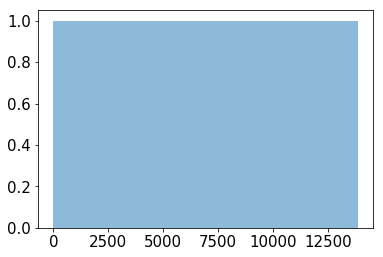

In [28]:
plt.hist(df.e0.values, cumulative=1, density=1, alpha=0.5)
plt.show()

In [30]:
df.e0.values.sort()

In [35]:
len(df.e0)

57596

In [57]:
df.e0.values[-500:]

array([  158,   159,   159,   159,   160,   161,   161,   161,   162,
         162,   162,   162,   163,   163,   163,   163,   163,   164,
         164,   165,   165,   165,   165,   166,   166,   166,   166,
         166,   167,   167,   167,   167,   167,   168,   168,   168,
         169,   169,   169,   169,   169,   169,   169,   170,   170,
         171,   171,   171,   172,   172,   173,   173,   173,   173,
         174,   174,   174,   174,   174,   175,   175,   176,   177,
         177,   177,   177,   177,   178,   178,   178,   179,   179,
         179,   181,   181,   181,   181,   181,   182,   182,   182,
         183,   183,   183,   185,   185,   186,   186,   187,   187,
         189,   189,   189,   190,   190,   191,   191,   191,   191,
         191,   192,   193,   193,   193,   194,   194,   194,   194,
         195,   195,   195,   196,   197,   197,   197,   197,   197,
         197,   197,   198,   198,   199,   199,   199,   200,   200,
         201,   201,